IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
You are using an XGBoost version below 1.6.0 which is not fully supported by shap. Shap falls back to encoding the model as JSON which can lead to numerical precision issues. Please consider upgrading to XGBoost 1.6.0 or higher.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[[-0.03054475 -0.05399098  0.00305555 ... -0.04899006 -0.00558674
  -0.20768063]
 [ 0.00994902  0.03046688  0.0043583  ... -0.06787878  0.03137318
  -0.11183999]
 [ 0.03422193  0.07101317  0.0036881  ...  0.00580783 -0.01861191
   0.00959447]
 ...
 [ 0.03758836  0.07189931  0.00585215 ... -0.00575852 -0.00545799
  -0.00146923]
 [-0.0068845   0.11517865  0.00503732 ... -0.00705721  0.02024202
  -0.13558862]
 [-0.03823201 -0.00570763  0.00250229 ... -0.0079965  -0.00950082
   0.02622167]]
.values =
array([[-0.03054475, -0.05399098,  0.00305555, ..., -0.04899006,
        -0.00558674, -0.20768063],
       [ 0.00994902,  0.03046688,  0.0043583 , ..., -0.06787878,
         0.03137318, -0.11183999],
       [ 0.03422193,  0.07101317,  0.0036881 , ...,  0.00580783,
        -0.01861191,  0.00959447],
       ...,
       [ 0.03758836,  0.07189931,  0.00585215, ..., -0.00575852,
        -0.00545799, -0.00146923],
       [-0.0068845 ,  0.11517865,  0.00503732, ..., -0.00705721,
         0.02024202, 

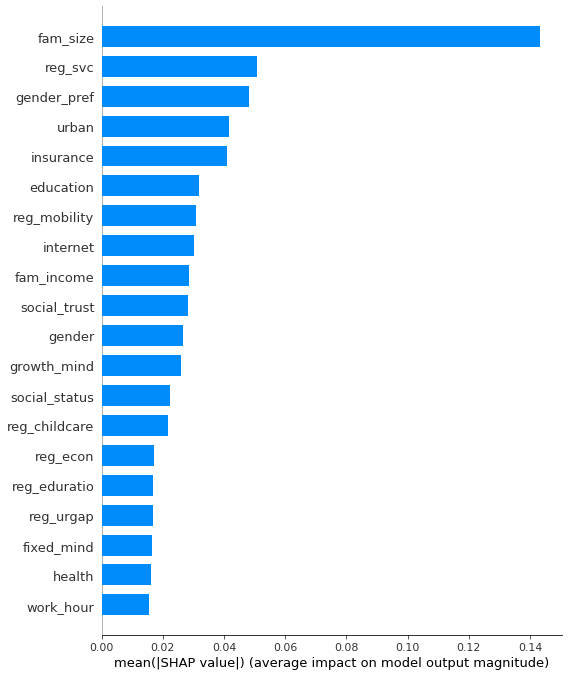

           feature  importance
0           gender    0.026605
1            urban    0.041568
2            party    0.008189
3         fam_size    0.143165
4            hukou    0.005490
5            ethno    0.003178
6        education    0.031717
7          age_gap    0.015349
8          edu_gap    0.010371
9      gender_pref    0.048104
10     mar_satisfy    0.013332
11            work    0.012717
12       work_hour    0.015512
13       insurance    0.041041
14   care_from_par    0.015472
15    fin_from_par    0.007272
16         fin_par    0.013316
17        care_par    0.003090
18        internet    0.030171
19    social_trust    0.028281
20   social_status    0.022244
21      fixed_mind    0.016460
22     growth_mind    0.025940
23        religion    0.000544
24     gover_evalu    0.008560
25   reg_eldercare    0.007503
26   reg_childcare    0.021626
27          health    0.015989
28    reg_medicare    0.014390
29           house    0.010753
30      fam_income    0.028486
31  fam_

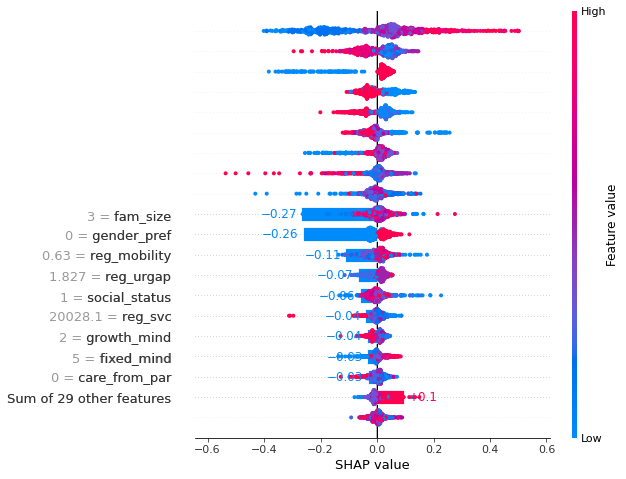

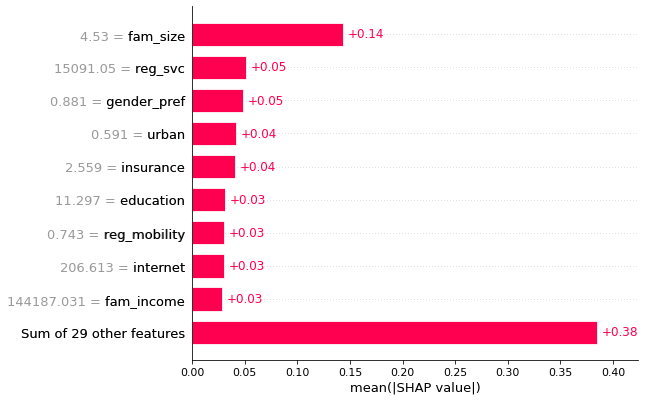

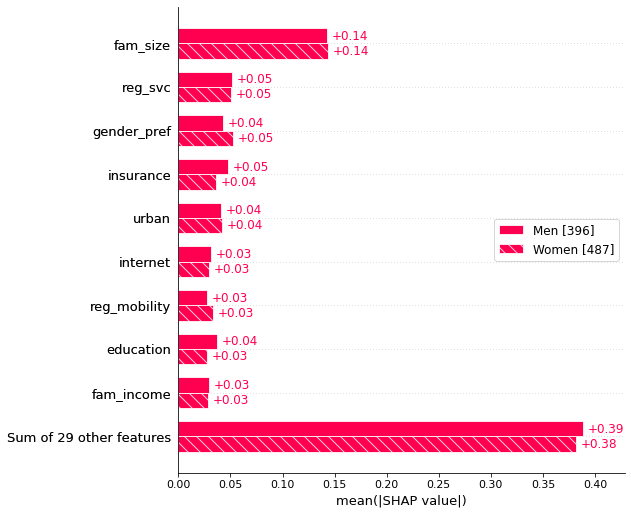

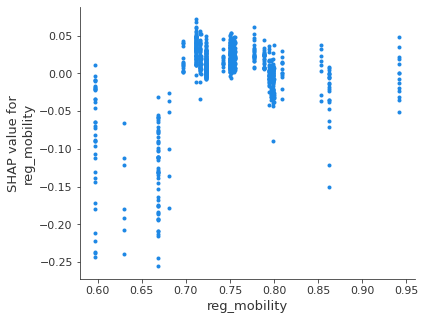

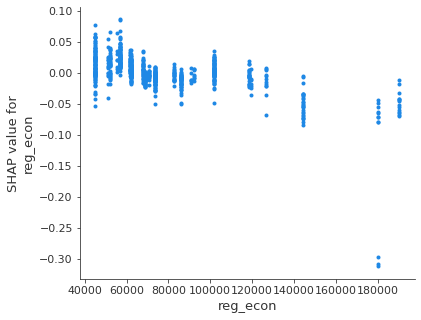

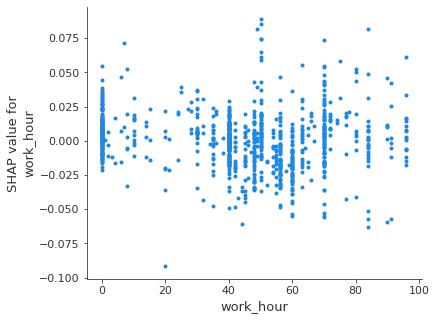

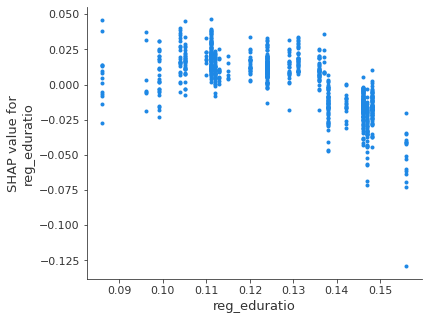

{'model_features': {'name': ['gender', 'urban', 'party', 'fam_size', 'hukou', 'ethno', 'education', 'age_gap', 'edu_gap', 'gender_pref', 'mar_satisfy', 'work', 'work_hour', 'insurance', 'care_from_par', 'fin_from_par', 'fin_par', 'care_par', 'internet', 'social_trust', 'social_status', 'fixed_mind', 'growth_mind', 'religion', 'gover_evalu', 'reg_eldercare', 'reg_childcare', 'health', 'reg_medicare', 'house', 'fam_income', 'fam_income_rel', 'area', 'reg_econ', 'reg_svc', 'reg_urgap', 'reg_eduratio', 'reg_mobility'], 'data': [0.010999999940395355, 0.020999999716877937, 0.019999999552965164, 0.07400000095367432, 0.017000000923871994, 0.019999999552965164, 0.02800000086426735, 0.019999999552965164, 0.014000000432133675, 0.0689999982714653, 0.013000000268220901, 0.01899999938905239, 0.020999999716877937, 0.03700000047683716, 0.024000000208616257, 0.023000000044703484, 0.017000000923871994, 0.020999999716877937, 0.03099999949336052, 0.02500000037252903, 0.02199999988079071, 0.021999999880790

In [1]:
import numpy as np
import pandas
import shap
import matplotlib.pyplot as plt
import xgboost as xgb
from spsspro.algorithm import supervised_learning
#生成案例数据
data = pandas.read_csv("0301 90s.CSV")
data_y = data.iloc[:, 0]
data_x = data.iloc[:, 1:]
#xgboost分类，输入参数详细可以光标放置函数括号内按shift+tab查看，输出结果参考spsspro模板分析报告
result = supervised_learning.xgboost_regression(data_x=data_x, data_y=data_y)
# SHAP分析
explainer = shap.TreeExplainer(result['model'])
shap_values = explainer.shap_values(data_x)
shap_values2 = explainer(data_x)
print(shap_values)
print(shap_values2)
shap.summary_plot(shap_values, data_x, feature_names=data_x.columns, plot_type="bar")
plt.show()
#数值展示
feature_importance = pandas.DataFrame()

feature_importance['feature'] = data_x.columns

feature_importance['importance'] = np.abs(shap_values).mean(0)

feature_importance.sort_values('importance', ascending=False)

print(feature_importance)

# 可视化
shap.summary_plot(shap_values, data_x, feature_names=data_x.columns, plot_type="dot",show=False)
plt.savefig('shap_90s.png',dpi=600)
#局部以及全局图
shap.plots.bar(shap_values2[1], show_data=True)
shap.plots.bar(shap_values2, show_data=True)
#队列条形图
sex = ["Women" if shap_values2[i,"gender"].data == 0 
       else "Men" for i in range(shap_values2.shape[0])]
shap.plots.bar(shap_values2.cohorts(sex).abs.mean(0))
#依赖图
shap.dependence_plot('reg_mobility', shap_values, data_x, interaction_index=None)
shap.dependence_plot('reg_econ', shap_values, data_x, interaction_index=None)
shap.dependence_plot('work_hour', shap_values, data_x, interaction_index=None)
shap.dependence_plot('reg_eduratio', shap_values, data_x, interaction_index=None)
print(result)